In [11]:
import polars as pl 
import matplotlib.pyplot as plt

<div style="text-align: center;">
  <div style="display: flex; align-items: center; justify-content: center;">
    <img src="images/polars2.png" alt="" style="width: 150px; height: 100px; margin-right: 10px;">
    <h2 style="margin: 0;">Polars</h2>
    <img src="images/polars.png" alt="" style="width: 150px; height: 100px; margin-left: 10px;">
  </div>
</div>



In [5]:
df_polars = pl.read_csv('Dataset\prueba.csv')
df_polars.head(5)

ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
i64,str,str,str,str,str,str,str,str,f64,f64
0,"""A-Bomb""","""good""","""Male""","""yellow""","""Human""","""No Hair""","""Marvel Comics""","""-""",203.0,441.0
1,"""Abe Sapien""","""good""","""Male""","""blue""","""Icthyo Sapien""","""No Hair""","""Dark Horse Com…","""blue""",191.0,65.0
2,"""Abin Sur""","""good""","""Male""","""blue""","""Ungaran""","""No Hair""","""DC Comics""","""red""",185.0,90.0
3,"""Abomination""","""bad""","""Male""","""green""","""Human / Radiat…","""No Hair""","""Marvel Comics""","""-""",203.0,441.0
4,"""Abraxas""","""bad""","""Male""","""blue""","""Cosmic Entity""","""Black""","""Marvel Comics""","""-""",-99.0,-99.0


In [7]:
df_polars.describe()

describe,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
str,f64,str,str,str,str,str,str,str,str,f64,f64
"""count""",734.0,"""734""","""734""","""734""","""734""","""734""","""734""","""734""","""734""",734.0,734.0
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""15""","""0""",0.0,2.0
"""mean""",366.5,null,null,null,null,null,null,null,null,102.254087,43.855191
"""std""",212.031837,null,null,null,null,null,null,null,null,139.624543,130.823733
"""min""",0.0,"""A-Bomb""","""-""","""-""","""-""","""-""","""-""","""ABC Studios""","""-""",-99.0,-99.0
"""max""",733.0,"""Zoom""","""neutral""","""Male""","""yellow / red""","""Zombie""","""blond""","""Wildstorm""","""yellow""",975.0,900.0
"""median""",366.5,null,null,null,null,null,null,null,null,175.0,62.0
"""25%""",183.0,null,null,null,null,null,null,null,null,-99.0,-99.0
"""75%""",550.0,null,null,null,null,null,null,null,null,185.0,90.0


Cantidad de personajes por buenos, malos, neutros y otros

In [10]:
cant_x_tipo = df_polars.groupby('Alignment').agg(pl.col('Alignment').count().alias('cantidad')).sort('Alignment', descending=True)
cant_x_tipo

Alignment,cantidad
str,u32
"""neutral""",24
"""good""",496
"""bad""",207
"""-""",7


In [55]:
cant_tipo_sexo = df_polars.filter(pl.col("Alignment")=='good')['Gender'].value_counts()
cant_tipo_sexo

Gender,counts
str,u32
"""-""",19
"""Female""",161
"""Male""",316


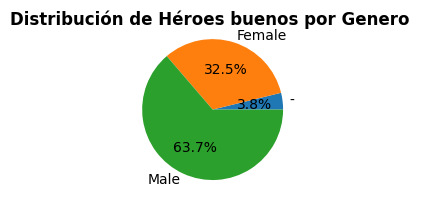

In [59]:
tipos = cant_tipo_sexo['Gender']
cantidad = cant_tipo_sexo['counts']
plt.figure(figsize=(2,2))
plt.pie(cantidad, labels= tipos, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribución de Héroes buenos por Genero ', fontsize= 12, fontweight='bold', color='black')
plt.show()

In [60]:
cant_tipo_sexo_bad = df_polars.filter(pl.col("Alignment")=='bad')['Gender'].value_counts()
cant_tipo_sexo_bad

Gender,counts
str,u32
"""Female""",35
"""-""",7
"""Male""",165


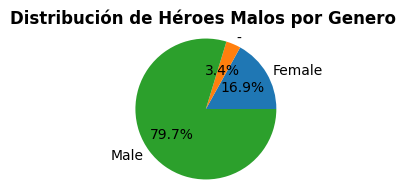

In [62]:
tipos = cant_tipo_sexo_bad['Gender']
cantidad = cant_tipo_sexo_bad['counts']
plt.figure(figsize=(2,2))
plt.pie(cantidad, labels= tipos, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribución de Héroes Malos por Genero ', fontsize= 12, fontweight='bold', color='black')
plt.show()

In [64]:
cant_tipo_sexo_neutral = df_polars.filter(pl.col("Alignment")=='neutral')['Gender'].value_counts()
cant_tipo_sexo_neutral

Gender,counts
str,u32
"""Male""",18
"""-""",2
"""Female""",4


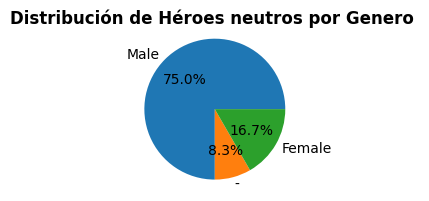

In [66]:
tipos = cant_tipo_sexo_neutral['Gender']
cantidad = cant_tipo_sexo_neutral['counts']
plt.figure(figsize=(2,2))
plt.pie(cantidad, labels= tipos, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribución de Héroes neutros por Genero ', fontsize= 12, fontweight='bold', color='black')
plt.show()

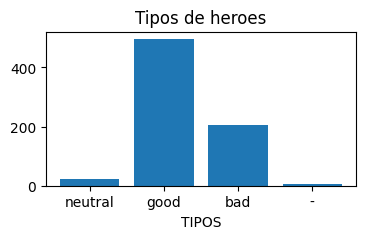

In [21]:
plt.figure(figsize=(4,2))
plt.bar(cant_x_tipo['Alignment'].to_list(), cant_x_tipo['cantidad'].to_list(), label=cant_x_tipo['cantidad'].to_list())
plt.xticks(rotation=0)
plt.title('Tipos de heroes')
plt.xlabel('TIPOS')
plt.show()

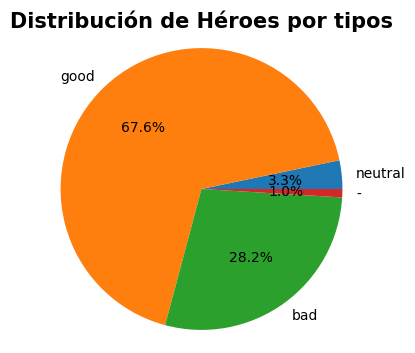

In [82]:
tipos = cant_x_tipo['Alignment']
cantidad = cant_x_tipo['cantidad']
plt.figure(figsize=(4,4))
plt.pie(cantidad, labels= tipos, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribución de Héroes por tipos', fontsize= 15, fontweight='bold', color='black')
plt.show()

Heroes por editoras

In [29]:
editoras = df_polars.groupby('Publisher').agg(pl.col('Publisher').count().alias('cantidad heroes').cast(pl.Int32)).sort('cantidad heroes', descending=True)
editoras

Publisher,cantidad heroes
str,i32
"""Marvel Comics""",388
"""DC Comics""",215
"""NBC - Heroes""",19
"""Dark Horse Com…",18
null,15
"""Image Comics""",14
"""George Lucas""",14
"""Star Trek""",6
"""HarperCollins""",6


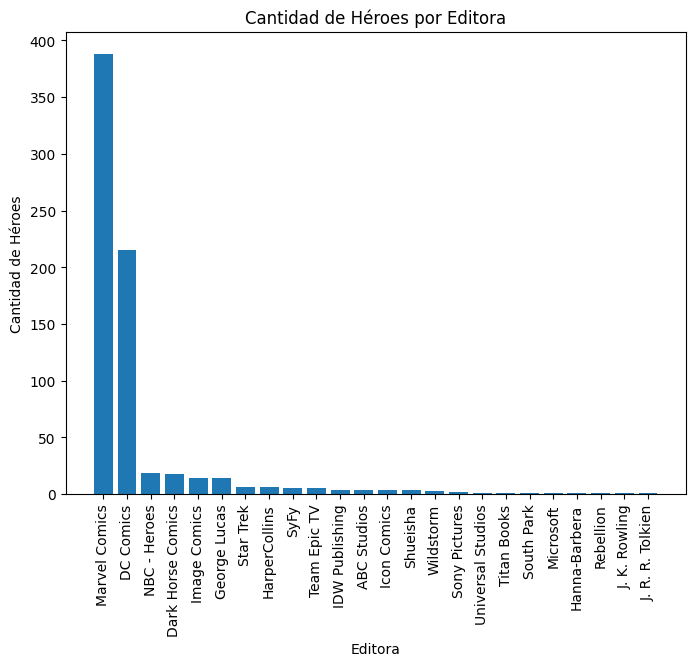

In [31]:
editoras = editoras.filter(pl.col('Publisher').is_not_null())
plt.figure(figsize=(8,6))
plt.bar(editoras['Publisher'].to_list(), editoras['cantidad heroes'].to_list(), label=editoras['cantidad heroes'].to_list())
plt.title('Cantidad de Héroes por Editora')
plt.xlabel('Editora')
plt.ylabel('Cantidad de Héroes')
plt.xticks(rotation=90)
plt.show()

Filtramos por las 4 principales

In [33]:
editoras_principales = df_polars.groupby('Publisher').agg(pl.col('Publisher').count().alias('cantidad heroes').cast(pl.Int64)).sort('cantidad heroes', descending=True).limit(4)
editoras_principales

Publisher,cantidad heroes
str,i64
"""Marvel Comics""",388
"""DC Comics""",215
"""NBC - Heroes""",19
"""Dark Horse Com…",18


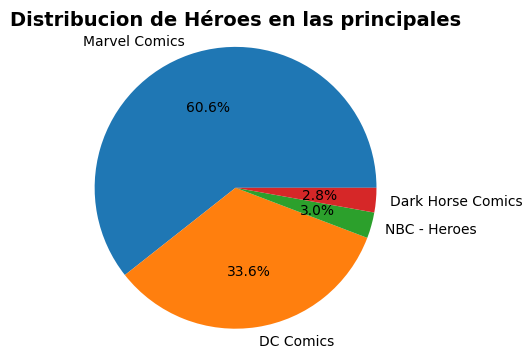

In [45]:
editoras = editoras_principales['Publisher']
cant_heroes = editoras_principales['cantidad heroes']
plt.figure(figsize=(4,4))
plt.pie(cant_heroes, labels= editoras, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribucion de Héroes en las principales', fontsize= 14, fontweight='bold', color='black', loc='center')
plt.show()